<a href="https://colab.research.google.com/github/yuyunt7/ODL-Assignment/blob/david_branch/david_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.colors
import matplotlib.ticker as mtick

# feature selection
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_regression, f_classif, chi2

# feature scaler
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# for fixing the imbalanced dataset and split
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

from sklearn.utils import resample

In [ ]:
df.isnull().sum()
df.dropna(inplace=True)

In [ ]:
df = pd.read_csv("diabetes_binary_health_indicators_BRFSS2015.csv")
df.head()

In [ ]:
for name in df.columns:
    df[name] = df[name].astype(int)
    # print(name , df[name].unique())

In [ ]:
#Drop duplications in dataframe
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229474 entries, 0 to 253679
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_binary       229474 non-null  int64
 1   HighBP                229474 non-null  int64
 2   HighChol              229474 non-null  int64
 3   CholCheck             229474 non-null  int64
 4   BMI                   229474 non-null  int64
 5   Smoker                229474 non-null  int64
 6   Stroke                229474 non-null  int64
 7   HeartDiseaseorAttack  229474 non-null  int64
 8   PhysActivity          229474 non-null  int64
 9   Fruits                229474 non-null  int64
 10  Veggies               229474 non-null  int64
 11  HvyAlcoholConsump     229474 non-null  int64
 12  GenHlth               229474 non-null  int64
 13  MentHlth              229474 non-null  int64
 14  PhysHlth              229474 non-null  int64
 15  DiffWalk              229474 non-n

In [ ]:
# drop column
df = df.drop(['AnyHealthcare','Education'], axis=1);

In [ ]:
# grouped variables
target = 'Diabetes_binary'
bool_vars = (df.nunique()[df.nunique() == 2]
                .index
                .drop(labels='Diabetes_binary'))
num_vars = [var for var in df.columns if var not in bool_vars and var != 'Diabetes_binary']

1     35097
0    194377
Name: Diabetes_binary, dtype: int64
1    15.294543%
0    84.705457%
Name: Diabetes_binary, dtype: object



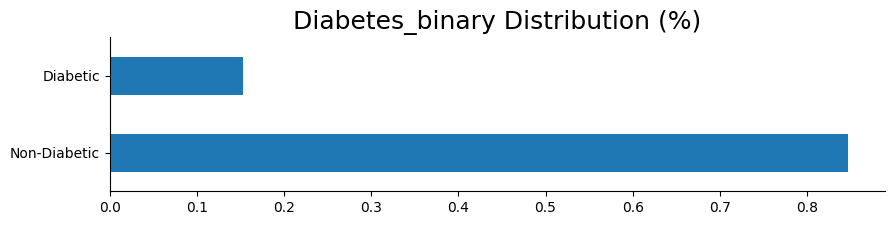

In [ ]:
print(df['Diabetes_binary'].value_counts(ascending=True))
print(df['Diabetes_binary'].value_counts(1,ascending=True).apply(lambda x: format(x, '%')))
print()
df['Diabetes_binary'].value_counts(1).plot(kind='barh',figsize=(10, 2)).spines[['top', 'right']].set_visible(False);
plt.title('Diabetes_binary Distribution (%)', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);

In [ ]:
Over, under sampling

In [ ]:
# from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.Diabetes_binary == 0]
df_minority = df[df.Diabetes_binary == 1]

# Downsample majority class
df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=45000,
                                   random_state=123)

df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Split features (X) and target (y) variables
X = df_downsampled.drop('Diabetes_binary', axis=1)
y = df_downsampled['Diabetes_binary']

# Perform oversampling using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=123)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Perform undersampling using RandomUnderSampler
under_sampler = RandomUnderSampler(sampling_strategy='auto', random_state=123)
X_resampled, y_resampled = under_sampler.fit_resample(X_resampled, y_resampled)

# Convert oversampled and undersampled data back to DataFrame
df_downsampled = pd.DataFrame(X_resampled, columns=X.columns)
df_downsampled['Diabetes_binary'] = y_resampled

In [ ]:
print(df_downsampled['Diabetes_binary'].value_counts(ascending=True))
print(df_downsampled['Diabetes_binary'].value_counts(1,ascending=True).apply(lambda x: format(x, '%')))
print()
df_downsampled['Diabetes_binary'].value_counts(1).plot(kind='barh',figsize=(10, 2)).spines[['top', 'right']].set_visible(False);
plt.title('Diabetes_binary Distribution (%)', fontsize=18)
plt.yticks(ticks=[0,1], labels=['Non-Diabetic', 'Diabetic']);

In [ ]:
df_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70194 entries, 82692 to 253679
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Diabetes_binary       70194 non-null  int64
 1   HighBP                70194 non-null  int64
 2   HighChol              70194 non-null  int64
 3   CholCheck             70194 non-null  int64
 4   BMI                   70194 non-null  int64
 5   HeartDiseaseorAttack  70194 non-null  int64
 6   PhysActivity          70194 non-null  int64
 7   GenHlth               70194 non-null  int64
 8   DiffWalk              70194 non-null  int64
 9   Age                   70194 non-null  int64
 10  Income                70194 non-null  int64
dtypes: int64(11)
memory usage: 6.4 MB


In [ ]:
# bmi (bar chart)
def tranform_bmi(x):
    if x < 18.5 :
        return 1
    elif 18.5 <= x <= 24.9 :
        return 2
    elif 25 <= x <= 29.9 :
        return 3
    else:
        return 4

In [ ]:
df_downsampled['BMI_bins'] = df_downsampled["BMI"].apply(tranform_bmi)

In [ ]:
del df_downsampled["BMI"]

Ma Codes


In [ ]:
pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import normalize
import keras_tuner as kt
from keras.layers import LSTM, Dense, Dropout,  BatchNormalization, Activation
from sklearn.model_selection import StratifiedKFold
import keras
import random
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
X = df_downsampled.iloc[:, 1:].values
y = df_downsampled.iloc[:, 0].values

In [ ]:
X = normalize(X, axis=0)
# X = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# X = (X - X.mean(axis=0)) / X.std(axis=0)
# X = (X - np.median(X, axis=0)) / (np.percentile(X, 75, axis=0) - np.percentile(X, 25, axis=0))
# X = X / np.linalg.norm(X, ord=2, axis=1, keepdims=True)
# X = np.log(X + 1)  # Adding 1 to avoid logarithm of zero

Visualization

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your original data in a NumPy array 'X'
# And the scaled data after Min-Max scaling in 'X_scaled'

# Randomly sample 100 data points from 'X' and 'X_scaled'
num_samples_to_plot = 100
sample_indices = np.random.choice(len(X), num_samples_to_plot, replace=False)
feature_indices = np.arange(1, 20)

# Set up the figure and subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the original data with blue lines for the sampled data
ax.plot(feature_indices, X[sample_indices].T, 'b-', alpha=0.5, label='Original Data (Sampled)')

# Plot the scaled data with red lines for the sampled data
ax.plot(feature_indices, X_scaled[sample_indices].T, 'r-', alpha=0.5, label='Scaled Data (Min-Max, Sampled)')

# Set plot title and labels
ax.set_title('Comparison Before and After Unit Vector Scaling (Sampled)')
ax.set_xlabel('Feature Index')
ax.set_ylabel('Feature Values')

# No legend, comment out or remove the following line:
# ax.legend()

# Show the plot
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Change 2D to 3D, adding sequence

In [ ]:
sequence_length = 1
X_train_seq = X_train[:, np.newaxis, :]
X_test_seq = X_test[:, np.newaxis, :]
y_train = y_train.reshape(-1, 1)

In [ ]:
# Trial 0102 summary
# Hyperparameters:
# 64: 320
# dropout_rate: 0.46869276466832943
# num_additional_layers: 2
# learning_rate: 0.01
# optimizer: adam
# loss_function: binary_crossentropy
# tuner/epochs: 10
# tuner/initial_epoch: 5
# tuner/bracket: 4
# tuner/round: 2
# tuner/trial_id: 0090
# Score: 0.7224823236465454
# Build the LSTM model
model = Sequential()
model.add(LSTM(320, input_shape=(sequence_length, 19), return_sequences=True))
model.add(LSTM(320, input_shape=(sequence_length, 19), return_sequences=True))
model.add(Dropout(rate=0.46869276466832943))
model.add(Dense(1, activation='sigmoid'))

learning_rate = 0.01
opt = keras.optimizers.Adam(learning_rate=learning_rate)
# Compile the model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Train the model
model.fit(X_train_seq, y_train, epochs=15, batch_size=128, validation_split=0.2)

# Make predictions on the test data
y_pred = model.predict(X_test_seq)
y_pred = y_pred.squeeze()
y_pred = (y_pred > 0.5).astype(int)

# You can also use predict_proba to get probabilities instead of classes
# y_pred_proba = model.predict_proba(X_test_seq)

mlp_acc = accuracy_score(y_test, y_pred)
mlp_pre = precision_score(y_test, y_pred, average='micro')
mlp_recall = recall_score(y_test, y_pred, average='micro')
mlp_f1 = f1_score(y_test, y_pred, average='micro')

print("MLP - Accuracy: {:.3f}.".format(mlp_acc))
print("MLP - Precision: {:.3f}.".format(mlp_pre))
print("MLP - Recall: {:.3f}.".format(mlp_recall))
print("MLP - F1_Score: {:.3f}.".format(mlp_f1))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))
print ('\n Clasification Report:\n', classification_report(y_test, y_pred))

Epoch 1/15
450/450 [==============================] - 25s 45ms/step - loss: 0.5729 - accuracy: 0.7082 - val_loss: 0.5503 - val_accuracy: 0.7226
Epoch 2/15
450/450 [==============================] - 20s 45ms/step - loss: 0.5599 - accuracy: 0.7173 - val_loss: 0.5523 - val_accuracy: 0.7233
Epoch 3/15
450/450 [==============================] - 20s 44ms/step - loss: 0.5547 - accuracy: 0.7196 - val_loss: 0.5531 - val_accuracy: 0.7251
Epoch 4/15
450/450 [==============================] - 20s 45ms/step - loss: 0.5542 - accuracy: 0.7212 - val_loss: 0.5405 - val_accuracy: 0.7303
Epoch 5/15
450/450 [==============================] - 19s 43ms/step - loss: 0.5534 - accuracy: 0.7229 - val_loss: 0.5467 - val_accuracy: 0.7235
Epoch 6/15
450/450 [==============================] - 20s 44ms/step - loss: 0.5524 - accuracy: 0.7230 - val_loss: 0.5416 - val_accuracy: 0.7287
Epoch 7/15
450/450 [==============================] - 19s 43ms/step - loss: 0.5522 - accuracy: 0.7227 - val_loss: 0.5437 - val_accuracy:

HP Tuning

In [ ]:
import tensorflow as tf
selected_layer_types = []
# Define the function to build the LSTM model

def build_lstm_model(hp):
    model = Sequential()

    lstm_units = hp.Int(64, min_value=32, max_value=512, step=32)

    layer_types = [LSTM(units = lstm_units, input_shape=(1, 19), return_sequences=True),
                   Dropout(rate=hp.Float('dropout_rate',min_value=0.2, max_value=0.5)),
                   Dense(lstm_units, activation='relu')
                  #  BatchNormalization()
                   ]

    # First LSTM layer
    model.add(LSTM(units = lstm_units, input_shape=(1, 19), return_sequences=True))

    # Hidden layer
    temp_layer = []
    num_additional_layers = hp.Int('num_additional_layers', min_value=2, max_value=4)
    for i in range(num_additional_layers):
        layer = random.choice(layer_types)
        temp_layer.append(layer)
        model.add(layer)
    selected_layer_types.append(temp_layer)
    # Last LSTM layer
    model.add(Dense(1, activation='sigmoid'))


    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop'])
    if optimizer == 'adam':
        opt = keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        opt = keras.optimizers.RMSprop(learning_rate=learning_rate)

    # Compile the model with hyperparameters
    model.compile(
        loss=hp.Choice('loss_function', values=['binary_crossentropy']),
        optimizer=opt,
        metrics=['accuracy']
    )
    return model

# Initialize the Keras Tuner and perform the search for best hyperparameters
tuner = kt.Hyperband(
    build_lstm_model,
    objective='val_accuracy',
    max_epochs=40,
    factor=2,
    directory='tuner_dir',
    project_name='lstm_tuning',
    overwrite = True
)

tuner.search(X_train_seq, y_train, epochs=50,batch_size=128, validation_split=0.3)

# Get the best model from the search
best_model = tuner.get_best_models(num_models=1)[0]

# Display the layer names
# for i, layer_type in enumerate(selected_layer_types):
#     print(f'Trial {i + 1}: {layer_type}')

Trial 113 Complete [00h 00m 27s]
val_accuracy: 0.7063046097755432

Best val_accuracy So Far: 0.7224823236465454
Total elapsed time: 00h 48m 25s

Search: Running Trial #114

Value             |Best Value So Far |Hyperparameter
448               |320               |64
0.269             |0.46869           |dropout_rate
2                 |2                 |num_additional_layers
0.0001            |0.01              |learning_rate
rmsprop           |adam              |optimizer
binary_crossent...|binary_crossent...|loss_function
5                 |10                |tuner/epochs
0                 |5                 |tuner/initial_epoch
3                 |4                 |tuner/bracket
0                 |2                 |tuner/round

Epoch 1/5
280/351 [======================>.......] - ETA: 8s - loss: 0.6871 - accuracy: 0.5603

KeyboardInterrupt: ignored

In [ ]:
# Display all trial's layers used
for i, layer_type in enumerate(selected_layer_types):
    print(f'Trial {i + 1}: {layer_type}')

Summary of n(10) best models

In [ ]:
tuner.results_summary(10)